**Execultando o desafio 14 em python**


1- Importe o conjunto de dados diamonds.

In [1]:
import polars as pl

In [3]:
diamonds = pl.read_csv("https://me315-unicamp.github.io/dados/diamonds.csv.gz")
print(diamonds)

shape: (53_940, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ x    ┆ y    ┆ z    │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ i64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326   ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326   ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327   ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334   ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 335   ┆ 4.34 ┆ 4.35 ┆ 2.75 │
│ …     ┆ …         ┆ …     ┆ …       ┆ … ┆ …     ┆ …    ┆ …    ┆ …    │
│ 0.72  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.75 ┆ 5.76 ┆ 3.5  │
│ 0.72  ┆ Good      ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.69 ┆ 5.75 ┆ 3.61 │
│ 0.7   ┆ Very Good ┆ D     ┆ S

2- Crie uma visualização de dados que descreva a associação existente entre as variáveis peso (carat) e preço (price). Que ações você tomou para garantir que você produziu um gráfico de boa qualidade? Escreva um parágrafo comunicando os seus achados.

In [6]:
!pip install plotly==5.24.1

In [7]:
from plotnine import ggplot, geom_point, aes, theme_minimal, labs, facet_wrap, theme_bw, facet_grid, geom_line, stat_smooth

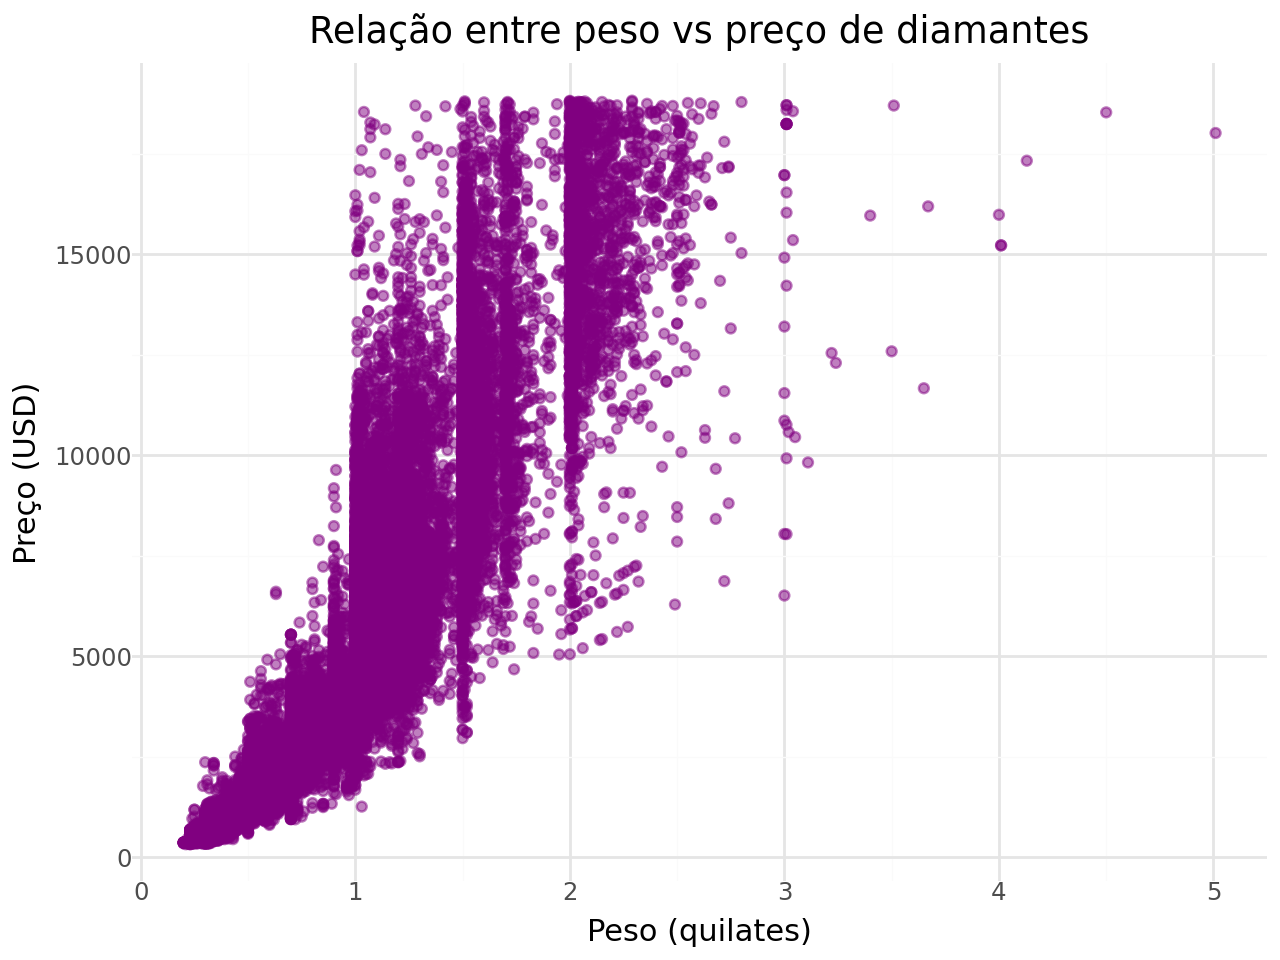

In [28]:
(
    ggplot(diamonds, aes(x = "carat", y = "price"))
    + geom_point(alpha = 0.5, color = "purple")
    + theme_minimal()
    + labs(title = "Relação entre peso vs preço de diamantes",
           x = "Peso (quilates)", y = "Preço (USD)")
)

O gráfico produzido acima, tem uma boa visualização. Além, de mostrar os outlier's em peso e preço, trazendo visualmente a concentração dos dados e mostrando que peso e preço esntão mais proximos de 0 e 1 peso(em quilates) e 5mil em preço(USD).

3- A relação identificada na questão anterior é a mesma relação presente nos diferentes cortes de diamantes? Crie uma visualização que demonstre seus achados eficientemente. Descreva sua conclusão em um parágrafo.

In [16]:
diamonds = diamonds.with_columns(
    pl.col("cut").cast(pl.Enum(["Fair", "Good", "Very Good", "Premium", "Ideal"])),
    pl.col("color").cast(pl.Enum(["J", "I", "H", "G", "F", "E", "D"])),
    pl.col("clarity").cast(pl.Enum(["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])))

print(diamonds)

shape: (53_940, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ x    ┆ y    ┆ z    │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ enum      ┆ enum  ┆ enum    ┆   ┆ i64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326   ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326   ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327   ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334   ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 335   ┆ 4.34 ┆ 4.35 ┆ 2.75 │
│ …     ┆ …         ┆ …     ┆ …       ┆ … ┆ …     ┆ …    ┆ …    ┆ …    │
│ 0.72  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.75 ┆ 5.76 ┆ 3.5  │
│ 0.72  ┆ Good      ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.69 ┆ 5.75 ┆ 3.61 │
│ 0.7   ┆ Very Good ┆ D     ┆ S

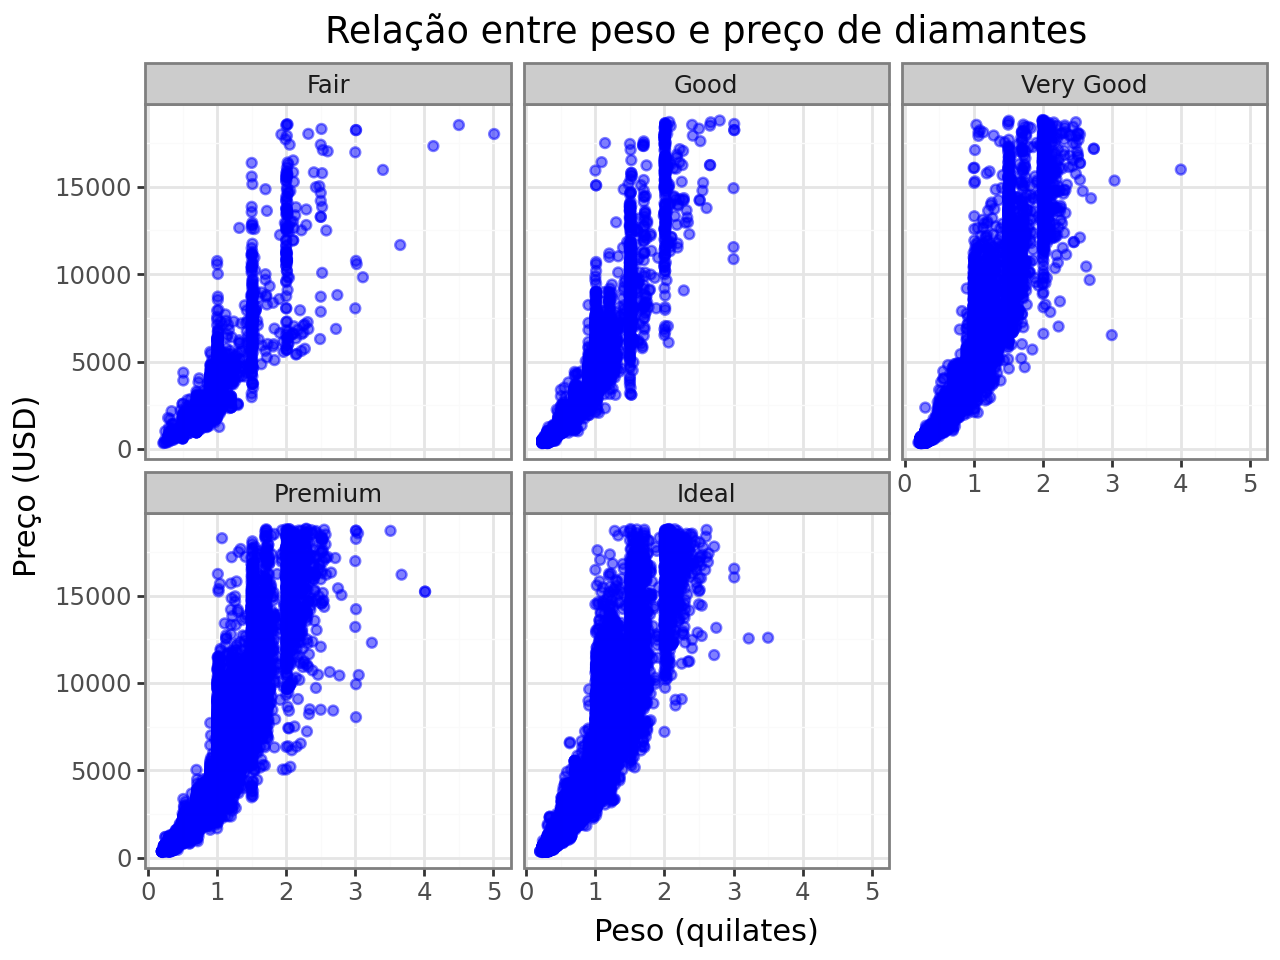

In [19]:
(
  ggplot(diamonds, aes(x = "carat", y = "price"))
         + geom_point(alpha = 0.5, color = "blue")
         + facet_wrap("cut")
         + theme_bw()
         + labs(title = "Relação entre peso e preço de diamantes",
                x = "Peso (quilates)", y = "Preço (USD)")
)

Apesar dos gráfico serem semelhantes, quando analisados os cortes de diamantes é possivel identificar pela visualização gráfica que sua concentração em qualidade e valores estão subindo, ou seja, quanto melhor o corte, mais caro será. Em contra partida, o gráfico da questão anterior, mostra o aglomerado dos cortes sem especificar mostrando uma concentração maior com mais coloração(pigmentação), apenas traduzindo dados dos diamantes com diferença de peso e preço.

4 - Crie uma visualização que mostre a relação entre preço e peso do diamante, considerando as diferentes combinações de qualidade de corte, cor e clareza do diamante. Quais foram as dificuldades encontradas? A relação entre preço e peso é a mesma para diferentes configurações de diamantes?

In [20]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 5.9 MB/s eta 0:00:00


In [21]:
from skmisc.loess import loess as loess_klass

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sur

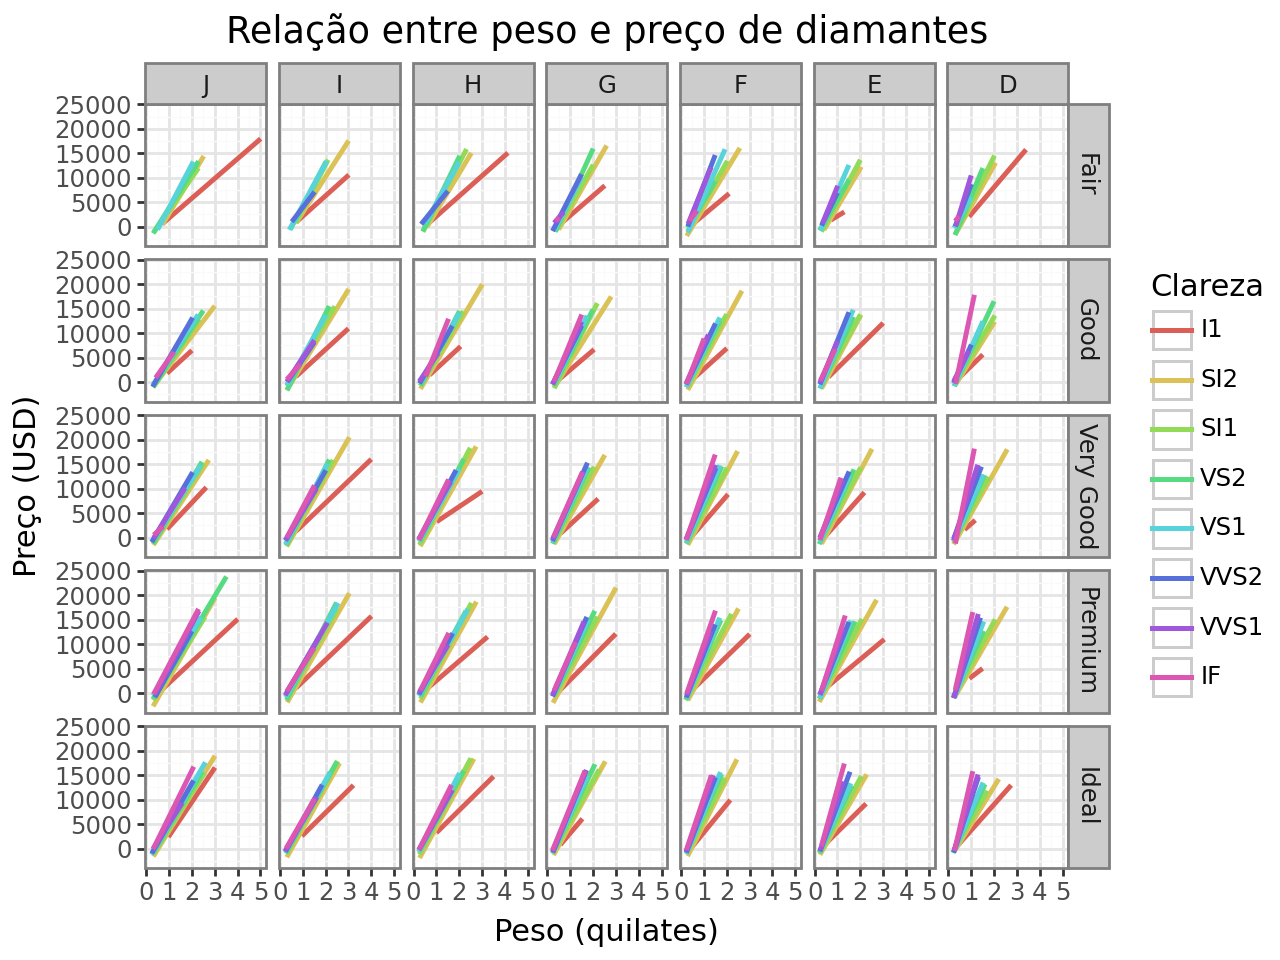

In [22]:
(
  ggplot(diamonds, aes(x = "carat", y = "price", color = "clarity"))
         + stat_smooth(method = "lm", se = False)
         + facet_grid("cut", "color")
         + theme_bw()
         + labs(title = "Relação entre peso e preço de diamantes",
                x = "Peso (quilates)", y = "Preço (USD)", colour = "Clareza")
)

A principal dificuldade foi aglomerar os dados de diferentes preços, qualidade, e peso de forma que ficasse visualmente clara. Há uma grande relação, entre peso e preço nos diferentes cortes. Porém quanto melhor o corte, mais precificado será, e tem uma aproximidade em cortes e preços no geral.